Importing the Dependencies

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt


Data Collection and Processing

In [31]:
# loading the csv data to a Pandas DataFrame
diabetes_dataset = pd.read_csv('T:/TryHard_IT_Project/MachineLearning/Project_Disease_Prediction_Nhom9/Code_thu_vien/dataset/diabetes.csv', encoding='ISO-8859-1') 

In [32]:
# print first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
# print last 5 rows of the dataset
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [34]:
# number of rows and columns in the dataset
diabetes_dataset.shape

(768, 9)

In [35]:
# getting some info about the data
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [36]:
# checking for missing values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [37]:
# statistical measures about the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [38]:
# checking the distribution of Target Variable
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [39]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [40]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [41]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Splitting the Data into Training data & Test Data

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Model Training

Logistic Regression

In [44]:
model = LogisticRegression()

In [45]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuracy Score

In [46]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [47]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7850162866449512


In [48]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [49]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.7532467532467533


In [50]:
# in điểm độ chính xác
print('Điểm độ chính xác của dữ liệu huấn luyện: ', training_data_accuracy)
print('Điểm độ chính xác của dữ liệu kiểm tra: ', test_data_accuracy)
# so sánh hai điểm độ chính xác
if training_data_accuracy > test_data_accuracy:
    print('Mô hình hoạt động tốt hơn trên dữ liệu huấn luyện.')
elif training_data_accuracy < test_data_accuracy:
    print('Mô hình hoạt động tốt hơn trên dữ liệu kiểm tra.')
else:
    print('Mô hình có độ chính xác bằng nhau trên cả dữ liệu huấn luyện và kiểm tra.')

Điểm độ chính xác của dữ liệu huấn luyện:  0.7850162866449512
Điểm độ chính xác của dữ liệu kiểm tra:  0.7532467532467533
Mô hình hoạt động tốt hơn trên dữ liệu huấn luyện.


Ma trận nhầm lẫn:
[[88 12]
 [26 28]]


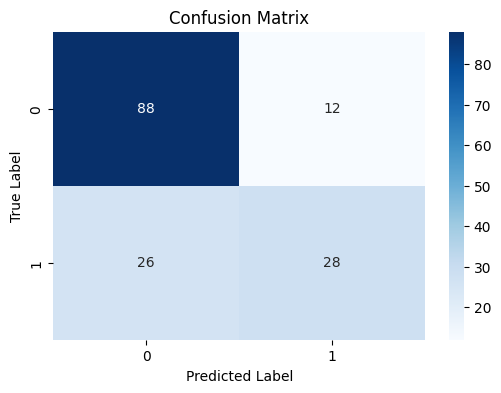

In [51]:
# Các chỉ số đánh giá bổ sung
# Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(Y_test, X_test_prediction)
print('Ma trận nhầm lẫn:')
print(cm)

# Trực quan hóa ma trận nhầm lẫn
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [53]:
# Báo cáo phân loại
print("\nBáo cáo phân loại:")
print(classification_report(Y_test, X_test_prediction))



Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       100
           1       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



In [23]:
# Tính toán Precision, Recall và F1 Score
precision = precision_score(Y_test, X_test_prediction)
recall = recall_score(Y_test, X_test_prediction)
f1 = f1_score(Y_test, X_test_prediction)

Building a Predictive System

In [24]:
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.7
Recall: 0.5185185185185185
F1 Score: 0.5957446808510639


In [25]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic


c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Saving the trained model

In [26]:
import pickle

In [27]:
filename = 'T:/TryHard_IT_Project/MachineLearning/Project_Disease_Prediction_Nhom9/Code_thu_vien/saved_models/diabetes_model_logictic.sav'
pickle.dump(model, open(filename, 'wb'))

In [28]:
# loading the saved model
loaded_model = pickle.load(open('T:/TryHard_IT_Project/MachineLearning/Project_Disease_Prediction_Nhom9/Code_thu_vien/saved_models/diabetes_model_logictic.sav', 'rb'))

In [30]:
for column in X.columns:
  print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
